## Contours

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("media/circle.png")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure()

# ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
# contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print(len(contours))
print(len(contours[0]))
print(len(contours[1]))

cv2.drawContours(img, contours, -1, (0,255,0), 3)

plt.imshow(img, cmap='gray')

In [3]:
import cv2
import numpy as np

image = cv2.imread('img/nature.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blurred, 50, 150)

contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

cv2.imshow('Contornos', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


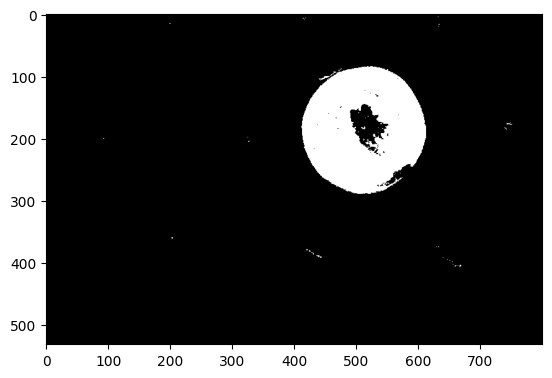

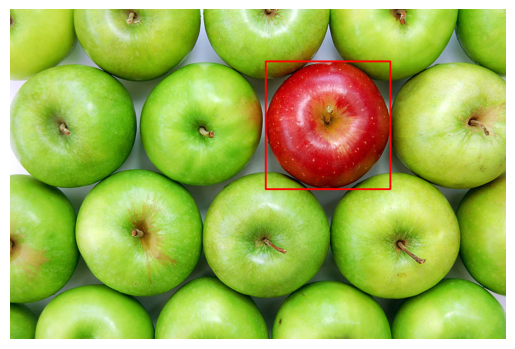

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Lee la imagen
img = cv2.imread("img/apples.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convierte la imagen a HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Define los rangos de color para detectar el color rojo
lower_red1 = np.array([0, 70, 50])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Crea máscaras para los rangos de color rojo
mask1 = cv2.inRange(hsv_img, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv_img, lower_red2, upper_red2)

# Combina las dos máscaras
mask = cv2.bitwise_or(mask1, mask2)

plt.imshow(mask, cmap="gray")
plt.figure()

# Encuentra los contornos en la máscara
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inicializa variables para el contorno más grande
max_area = 0
largest_contour = None

# Itera sobre los contornos para encontrar el más grande
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour

# Dibuja el rectángulo alrededor del contorno más grande
if largest_contour is not None:
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Dibuja en azul

# Muestra la imagen con el contorno más grande resaltado
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()


In [8]:
import cv2 
import numpy as np

cap = cv2.VideoCapture("img/Conveyor Belt Top Lights.mp4")

fps = cap.get(cv2.CAP_PROP_FPS)
# print(fps)

w_f = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h_f = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

x_f= w_f // 2
y_f = h_f // 2

x = 0
w = w_f
y = h_f // 2
h = h_f // 4

color_ranges = {
    'red': ([0, 120, 70], [10, 255, 255]),     # Red
    'green': ([36, 25, 25], [70, 255, 255]),   # Green
    'blue': ([94, 80, 2], [126, 255, 255])     # Blue
}

color_info = {
    'red': ((50,50), (0,0,0)),     # Red
    'green': ((50,100), (0,0,0)),   # Green
    'blue': ((50,150), (0,0,0))     # Blue
}


def filter_contours_by_area(contours, min_area, max_area):
    filtered_contours = []
    for contour in contours:
        area = cv2.contourArea(contour)
        print(area)
        if min_area < area < max_area:
            filtered_contours.append(contour)
    return filtered_contours


try:
    while True:
        ret, frame = cap.read()
        frame = cv2.resize(frame, (x_f,y_f))

        # No more frames captured. Exiting.
        if not ret:
            break

        # Changing to HSV to work with color values and saturation.
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

        for color_name, (lower, upper) in color_ranges.items():
            # Mask definition per color.
            lower = np.array(lower)
            upper = np.array(upper)
            mask = cv2.inRange(hsv, lower, upper)

            # Gaussian and Canny.
            mask_blur = cv2.GaussianBlur(mask, (11, 11), 10)
            canny = cv2.Canny(mask_blur, 30, 150)
            
            # Manipulation of edges.
            kernel = np.ones((5,5), dtype=np.uint8)
            
            dilated = cv2.dilate(canny, (1, 1), iterations=10)
            closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

            # Finding contours.
            cnts, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = filter_contours_by_area(cnts, min_area=100, max_area=10000)
            cv2.drawContours(frame, cnts, -1, (0, 255, 0), 2)
            
            # Showing the mask for each color.
            cv2.imshow(f"{color_name} mask", dilated)

            cv2.putText(frame, 
                        text=f"Color: {color_name} - Counts: {len(cnts)}", 
                        org=color_info[color_name][0], 
                        fontFace=cv2.FONT_HERSHEY_TRIPLEX, 
                        fontScale=0.8, 
                        color=color_info[color_name][1])

        cv2.imshow("Frame", frame)


        k = cv2.waitKey(int(1000/(1 * fps)))
        # k = cv2.waitKey(0)

        if k == ord('q'):
            break

except Exception as error:
    print("SOME ERROR: ")
    print(error)

finally:
    cap.release()
    cv2.destroyAllWindows()

0.0
425.0
764.0
1131.0
1476.5
6264.0
6325.5
6278.0
6207.0
6147.0
6128.0
6020.5
5921.5
5907.5
5844.0
5735.0
5717.0
5624.5
5609.5
